# Data Input

In [1]:
import pandas as pd
import numpy as np

db_path = 'C:\\Users\\LENOVO\\Downloads\\PHEME\\dataset.csv'

db = pd.read_csv(db_path)

In [2]:
display(db)
db.describe()

text  is_rumor  \
0      Charlie Hebdo became well known for publishing...       0.0   
1      Now 10 dead in a shooting there today RT "@BBC...       0.0   
2      @BBCDanielS @BBCWorld I'm guessing this is bei...       0.0   
3      @BBCDanielS @BBCWorld why would you mention th...       0.0   
4                @BBCDanielS @BBCWorld perps identified?       0.0   
...                                                  ...       ...   
62440  @AnonyOps @Xplant So that means its ok to torc...       1.0   
62441  @RianAlden not at all, but they need to change...       1.0   
62442  @Xplant @AnonyOps Absoluteky.  But it pains me...       1.0   
62443  @Xplant @AnonyOps I'm curious how many of thes...       1.0   
62444  @Xplant @AnonyOps You get 15,000 people showin...       1.0   

         user.handle         topic  
0         BBCDanielS  charliehebdo  
1          robbylevy  charliehebdo  
2      ModerateInAll  charliehebdo  
3        GabTarquini  charliehebdo  
4      freethought41  charliehebdo  
...              ...           ...  
62440      RianAlden      ferguson  
62441         Xplant      ferguson  
62442      RianAlden      ferguson  
62443      RianAlden      ferguson  
62444      RianAlden      ferguson  

[62445 rows x 4 columns]

is_rumor
count  62443.000000
mean       0.221386
std        0.415183
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

Data Overview:
                                                text  is_rumor    user.handle  \
0  Charlie Hebdo became well known for publishing...       0.0     BBCDanielS   
1  Now 10 dead in a shooting there today RT "@BBC...       0.0      robbylevy   
2  @BBCDanielS @BBCWorld I'm guessing this is bei...       0.0  ModerateInAll   
3  @BBCDanielS @BBCWorld why would you mention th...       0.0    GabTarquini   
4            @BBCDanielS @BBCWorld perps identified?       0.0  freethought41   

          topic  
0  charliehebdo  
1  charliehebdo  
2  charliehebdo  
3  charliehebdo  
4  charliehebdo  


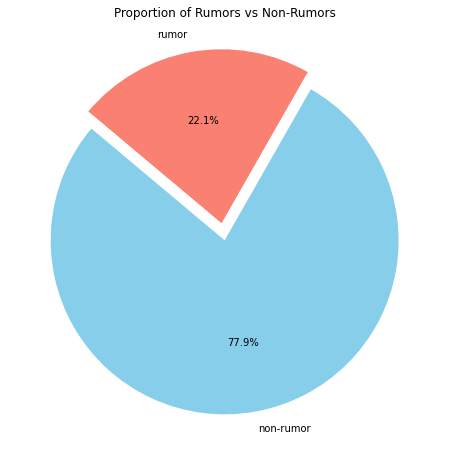

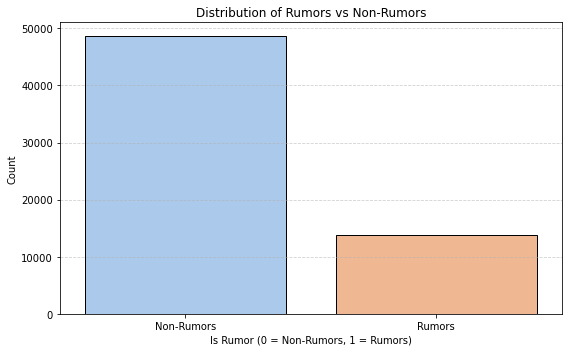

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = db

# Data overview
print("Data Overview:")
print(data.head())

# Count the number of rumors (1) and non-rumors (0)
rumor_counts = data['is_rumor'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rumor_counts, labels=['non-rumor', 'rumor'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140, explode=(0, 0.1))
plt.title('Proportion of Rumors vs Non-Rumors')
plt.show()

# Create a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=rumor_counts.index, y=rumor_counts.values, palette='pastel', edgecolor='black')
plt.title('Distribution of Rumors vs Non-Rumors')
plt.xlabel('Is Rumor (0 = Non-Rumors, 1 = Rumors)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Rumors', 'Rumors'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Data Preprocessing

## Data cleaning

In [66]:
# Keep only rows where 'is_rumor' contains 1 or 0
db = db[db['is_rumor'].isin([1, 0])]
df = db.dropna(subset=['text'])
df = db.dropna(subset=['topic'])
df

text  is_rumor  \
0      Charlie Hebdo became well known for publishing...       0.0   
1      Now 10 dead in a shooting there today RT "@BBC...       0.0   
2      @BBCDanielS @BBCWorld I'm guessing this is bei...       0.0   
3      @BBCDanielS @BBCWorld why would you mention th...       0.0   
4                @BBCDanielS @BBCWorld perps identified?       0.0   
...                                                  ...       ...   
62440  @AnonyOps @Xplant So that means its ok to torc...       1.0   
62441  @RianAlden not at all, but they need to change...       1.0   
62442  @Xplant @AnonyOps Absoluteky.  But it pains me...       1.0   
62443  @Xplant @AnonyOps I'm curious how many of thes...       1.0   
62444  @Xplant @AnonyOps You get 15,000 people showin...       1.0   

         user.handle         topic  
0         BBCDanielS  charliehebdo  
1          robbylevy  charliehebdo  
2      ModerateInAll  charliehebdo  
3        GabTarquini  charliehebdo  
4      freethought41  charliehebdo  
...              ...           ...  
62440      RianAlden      ferguson  
62441         Xplant      ferguson  
62442      RianAlden      ferguson  
62443      RianAlden      ferguson  
62444      RianAlden      ferguson  

[49666 rows x 4 columns]

## Inspect Lengths of News

In [67]:
titles = [text for text in df.text]
# titles
max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 49666
Max length of the titles: 34
Mean length of the titles: 14.738634075625177


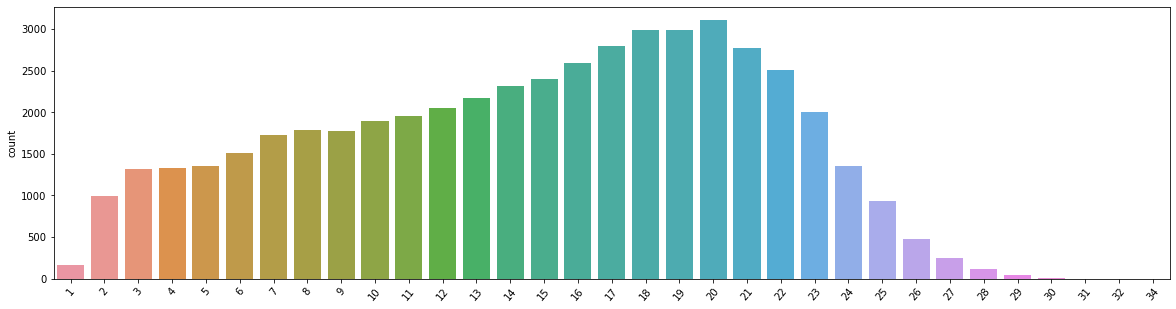

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [69]:
# texts = [text for text in df.text]

# max_len = 0
# texts_len = []
# for text in texts:
#     texts_len.append(len(text.split()))
#     max_len = max(len(text.split()), max_len)

# # g = sns.countplot(x=texts_len)
# print('Mean length of the texts:', np.mean(texts_len))

## Purify & Shffle the DataFrame

In [70]:
from sklearn.utils import shuffle

df = df[['text', 'topic', 'is_rumor']]

# Shuffle
df = shuffle(df).reset_index(drop=True)
display(df)

text         topic  \
0      @johannhari101 it's more important to show tha...  charliehebdo   
1      @VegasNobody @GinaGrad @VICE http://t.co/2bqbb...  charliehebdo   
2      @peace_ethics @Telegraph If you read the news ...  charliehebdo   
3      @zellieimani allowed to become that way by the...      ferguson   
4      @PittWitchHunt @fuller_derek @GLove39 been tha...  charliehebdo   
...                                                  ...           ...   
49661                                  @USATODAY Freedom  charliehebdo   
49662  @GlobalGrindNews @UncleRUSH Look at the Mail B...      ferguson   
49663  @decyberdiva a clerk and a customer. The custo...      ferguson   
49664  @Telegraph Ones ideology is not the responsibi...  charliehebdo   
49665  @TIME prayers for France! USA SUPPORTS FREEDOM...  charliehebdo   

       is_rumor  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
49661       0.0  
49662       0.0  
49663       1.0  
49664       0.0  
49665       0.0  

[49666 rows x 3 columns]

## Split Data into Training, Validation, Test

In [71]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (31786, 3)
valset size: (7947, 3)
testset size: (9933, 3)


## Dataframe to csv

In [73]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [74]:
df = pd.concat([train_df, val_df, test_df])
df

text         topic  \
0     @WutangGeorgia the WOE'S ME..is holding some b...      ferguson   
1         @WesleyLowery What’s the meaning of his sign?      ferguson   
2     @An0nKn0wledge @YourAnonNews @NomaNescio he lo...  charliehebdo   
3     @MissingReagan @AnthonyCumia what does "these ...      ferguson   
4     @Santa401 @verlaine101 @AdamWagner1 yes, I fol...  charliehebdo   
...                                                 ...           ...   
9928  @MSharqawii I wouldn't like it.. But I wouldn'...  charliehebdo   
9929    @dhamini @DamidotValerie http://t.co/Tg22FnIJl8  charliehebdo   
9930  @TVMarci @ABCWorldNews police escalating the s...      ferguson   
9931  @sumi_hasan Allah is the protector of Quran , ...  charliehebdo   
9932  @TIME prayers for France! USA SUPPORTS FREEDOM...  charliehebdo   

      is_rumor  
0          1.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  
...        ...  
9928       0.0  
9929       0.0  
9930       0.0  
9931       0.0  
9932       0.0  

[49666 rows x 3 columns]

## Performing Data Cleaning

In [75]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [77]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [78]:
# !pip install gensim
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['text'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [79]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

44819

## BERT

In [80]:
!pip install typing_extensions

In [81]:
!pip install transformers
!pip install torch

import torch
from transformers import BertTokenizer

In [82]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [83]:
import pandas as pd

# Assuming 'df' is your pandas DataFrame and 'label_column' is the column name for labels
if pd.api.types.is_numeric_dtype(df['is_rumor']):
    print("All labels are numeric.")
else:
    print("Some labels are not numeric.")

All labels are numeric.


## Load Dataset Class

In [84]:
from torch.utils.data import Dataset
import torch
import pandas as pd

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(f'{mode}.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    # Define the function to return a single data sample
    def __getitem__(self, idx):
        # Extract the statement, topic, and label (assuming the order in your dataset)
        statement, topic, label = self.df.iloc[idx, :].values
#         print(f"Label: {label}, Type: {type(label)}")
        
        label_tensor = torch.tensor(int(label))

        # Tokenize the statement and prepare it for BERT
        word_pieces = ['[CLS]']
        statement_tokens = self.tokenizer.tokenize(statement)
        word_pieces += statement_tokens + ['[SEP]']
        len_st = len(word_pieces)
        
        # Tokenize the topic similarly to how you tokenize the statement
        topic_tokens = self.tokenizer.tokenize(topic)
        word_pieces += topic_tokens + ['[SEP]']  # Append topic tokens and [SEP]
        len_topic = len(word_pieces) - len_st  # Length of the topic tokens

        # Convert the entire token sequence into an index sequence
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # Create the segment tensor: 
        # 0 for statement and 1 for topic (if treated like two sentences in BERT)
        segments_tensor = torch.tensor([0] * len_st + [1] * len_topic, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len



# Initialize Datasets with the tokenizer
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

# Print sizes of the datasets
print('trainset size:', trainset.__len__())
print('valset size:', valset.__len__())
print('testset size:', testset.__len__())

trainset size: 31786
valset size: 7947
testset size: 9933


## Sampling and Observing Tensors

In [85]:
sample_idx = 0

statement, topic, label = trainset.df.iloc[sample_idx].values

tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")

Label: 1.0, Type: <class 'numpy.float64'>

original_statement: 
@WutangGeorgia the WOE'S ME..is holding some back..@angryblackpat

tokens: 
['[CLS]', '@', 'wu', '##tang', '##ge', '##org', '##ia', 'the', 'wo', '##e', "'", 's', 'me', '.', '.', 'is', 'holding', 'some', 'back', '.', '.', '@', 'angry', '##bla', '##ck', '##pa', '##t', '[SEP]', 'ferguson', '[SEP]']

label: 1.0

--------------------

tokens_tensor: 
tensor([  101,  1030,  8814, 26067,  3351, 21759,  2401,  1996, 24185,  2063,
         1005,  1055,  2033,  1012,  1012,  2003,  3173,  2070,  2067,  1012,
         1012,  1030,  4854, 28522,  3600,  4502,  2102,   102, 11262,   102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1])

label_tensor: 
1




## Reforming the Dataset to Fit the Model

In [86]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

def create_mini_batch(samples):
    # Extract tokens (text), topic, and labels
    tokens_tensors = [s[0] for s in samples]  # Text tokens
    topics_tensors = [s[1] for s in samples]  # Topic feature
    
    # Test set might have labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])  # Labels
    else:
        label_ids = None
    
    # Zero Padding for tokens
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    
    # Zero Padding for topics if they are variable-length sequences (optional)
    # Otherwise, if they are single values (like a class index), you may not need padding
    topics_tensors = pad_sequence(topics_tensors, batch_first=True) if isinstance(topics_tensors[0], torch.Tensor) and len(topics_tensors[0].shape) > 0 else torch.stack(topics_tensors)
    
    # Create attention masks (1 for non-padding tokens, 0 for padding tokens)
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, topics_tensors, masks_tensors, label_ids


# Initialize DataLoader for train, validation, and test sets
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)


In [87]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>

tokens_tensors.shape   = torch.Size([16, 101]) 
tensor([[  101,  1030,  8814,  ...,     0,     0,     0],
        [  101,  1030, 11482,  ...,     0,     0,     0],
        [  101,  1030,  2019,  ...,     0,     0,     0],
        ...,
        [  101,  1030,  9587,  ...,     0,     0,     0],
        [  101,  1030,  5736,  ...

## Model Construction

In [88]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()
print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [89]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [90]:
# %%time
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("device:", device)
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()  # Use CrossEntropyLoss

NUM_EPOCHS = 3

for epoch in range(NUM_EPOCHS):
    model.train()  # Set model to training mode
    
    train_loss = 0.0
    correct_preds = 0
    total_preds = 0

    loop = tqdm(trainloader)
    
    for batch_idx, data in enumerate(loop):
        tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

        # Convert labels to long tensor for CrossEntropyLoss
        labels = labels.long()

        # Zero out gradients before each batch
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids=tokens_tensors, 
                        token_type_ids=segments_tensors, 
                        attention_mask=masks_tensors)

        # Get logits and calculate loss
        logits = outputs[0]
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        train_loss += loss.item()

        # Get model predictions
        _, pred = torch.max(logits.data, 1)

        # Update correct predictions and total number of samples
        correct_preds += (pred == labels).sum().item()
        total_preds += labels.size(0)

        # Update tqdm loop with loss and accuracy
        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(acc=correct_preds/total_preds, loss=train_loss/(batch_idx+1))

    # At the end of the epoch, print final metrics
    epoch_loss = train_loss / len(trainloader)
    epoch_acc = correct_preds / total_preds
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


device: cpu


  0%|          | 0/1987 [00:00<?, ?it/s]

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

  0%|          | 0/1987 [00:00<?, ?it/s]

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

  0%|          | 0/1987 [00:00<?, ?it/s]

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

In [91]:
# loop = tqdm(trainloader)
    
# for batch_idx, data in enumerate(loop):
#     tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]
#     if not isinstance(label, (int, float)):
#         print("The value is not numeric.")

# Fine-Tuning of BERT

## Save Model

In [92]:
torch.save(model, './pheme_model.pth')
print('Model saved!')

Model saved!


## Load Model

In [93]:
model = torch.load('./pheme_model.pth')
model = model.to('cpu')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_22488/964042281.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./pheme_model.pth')


# Test

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.fl

Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.float64'>
Label: 1.0, Type: <class 'numpy.float64'>
Label: 0.0, Type: <class 'numpy.fl

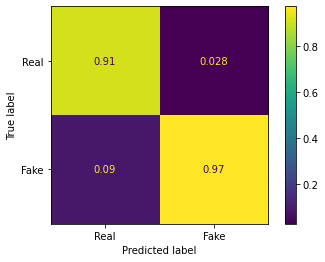

In [94]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [96]:
df = pd.DataFrame({"pred_label": predictions})

# Concatenating 'text', 'topic', 'is_rumor' columns along with 'pred_label'
df_pred = pd.concat([testset.df.loc[:, ['text']], 
                     testset.df.loc[:, ['topic']], 
                     testset.df.loc[:, ['is_rumor']], 
                     df.loc[:, 'pred_label']], axis=1)

# Optional: Save the DataFrame to CSV (commented out)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)

# Display the final DataFrame
df_pred


text         topic  \
0     @johannhari101 it's more important to show tha...  charliehebdo   
1     @peace_ethics @Telegraph If you read the news ...  charliehebdo   
2     @DVATW @WantEnglandBack The BBC needs ripping ...  charliehebdo   
3                   @swytwer I can't keep up with you:)  charliehebdo   
4     @MENnewsdesk Please RT - Download a hilarious ...  charliehebdo   
...                                                 ...           ...   
9928  @MSharqawii I wouldn't like it.. But I wouldn'...  charliehebdo   
9929    @dhamini @DamidotValerie http://t.co/Tg22FnIJl8  charliehebdo   
9930  @TVMarci @ABCWorldNews police escalating the s...      ferguson   
9931  @sumi_hasan Allah is the protector of Quran , ...  charliehebdo   
9932  @TIME prayers for France! USA SUPPORTS FREEDOM...  charliehebdo   

      is_rumor  pred_label  
0          0.0           0  
1          0.0           0  
2          0.0           0  
3          0.0           0  
4          0.0           0  
...        ...         ...  
9928       0.0           0  
9929       0.0           0  
9930       0.0           0  
9931       0.0           0  
9932       0.0           0  

[9933 rows x 4 columns]

In [98]:
from sklearn.metrics import classification_report
print(classification_report(df_pred.is_rumor, df_pred.pred_label))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      8642
         1.0       0.91      0.81      0.86      1291

    accuracy                           0.96      9933
   macro avg       0.94      0.90      0.92      9933
weighted avg       0.96      0.96      0.96      9933



## Insight on Wrong Classification

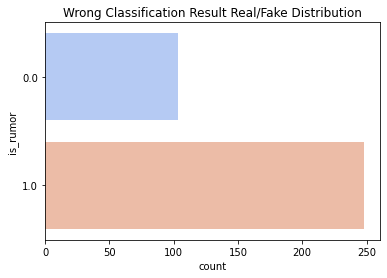

In [100]:
wrong_df = df_pred[df_pred.is_rumor != df_pred.pred_label]
sns.countplot(y="is_rumor", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [103]:
wrong_titles = df_pred[df_pred.is_rumor != df_pred.pred_label].text.values
wrong_titles

array(['@RianAlden not at all, but they need to change some things at #ferguson PD. @AnonyOps',
       '@larryelder @adagioforstring Yet the POTUS wants 4billon for illegals.',
       '@AntonioFrench Bruh could he be any more incoherent?',
       '@larryelder #BeerSummit', '@RMoronie no they are not.',
       '@TheAnonMessage2 I heard he is a suspect in a convenience store robbery and he may have went for the officers gun',
       '@AntonioFrench is there any information on the officer involved? such as a name',
       '“@AntonioFrench: Officer who shot #MikeBrown has been named. His name is Darren Wilson, a 6-year vet of the #Ferguson police dept.”',
       '@AnonyOps BULLSHIT!!!!!!',
       '@ReignOfApril the science of brain behaviors: has historically, and will continually be unable to function in a fast , moving, complicated',
       '@Ian56789 http://t.co/eMpLqV61yB nut voor news for earth Cabal defeat is looming',
       '@ReignOfApril Oh my god. What imbeciles.',
       '@Anton